ACF - Autocorrelation Plot Function

PACF - Partial Autocorrelation Plot Function

Correlation measures the strength of linear relationship between 2 variables

The closer the correlation is to +1, the stronger the positive linear relationship

The closer the correaltion is to -1, the stronger the negative linear relationship.

and the closer the correlation is to zero, the weaker the linear relationship or assosiation

##### An autocorrelation plot(also knows a correlogram) shows the correlation
##### of series with itself, lagged by x time units.

#####  the y axis is the correlation and th x axis is th number of time units of lag

In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

Loading Non stationary Dataset first

In [4]:
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [5]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df1.index.freq = 'MS'

In [7]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Loading Stationary data

In [8]:
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [9]:
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [10]:
df2.index.freq = 'D'

In [11]:
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [15]:
df1.head() #Airline Passenger Data - Monthly/

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
df2.head()# Daily Female Birth Data

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [17]:
## adding code to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
## autoCorrelation Function

df = pd.DataFrame({'a':[13,5,11,12,9]})

In [19]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [21]:
## Caluculating autocorrealation for this df in 1Dimension
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [22]:
## Partial Autocorrelation Function
pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [23]:
pacf_yw(df['a'],nlags=4,method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [24]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

#### Plotting acf and pacf 

plotting lag plots first

In [25]:
from pandas.plotting import lag_plot

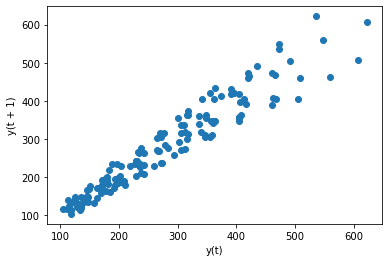

In [27]:
lag_plot(df1['Thousands of Passengers']) # on non stationary data

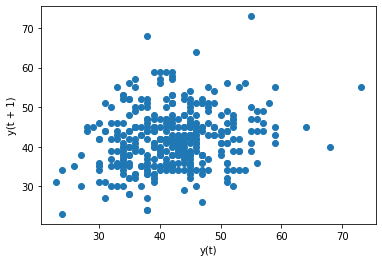

In [30]:
## on stationary data
lag_plot(df2['Births'])

## acf and pacf plots

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

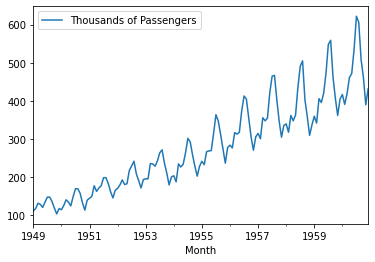

In [32]:
df1.plot() # airline data-- non stationary

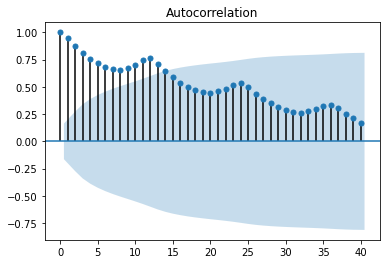

In [36]:
# we can see here there is repitative pattern because of the stationarity
plot_acf(df1,lags=40);

The shaded region is 95% confidence interval. So the correlation values outside the confidence interval
are very highly likely to be a correlation. Area gets increasing as lags gets larger as well 

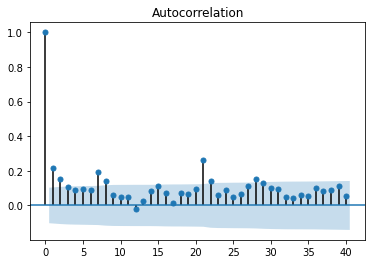

In [39]:
plot_acf(df2,lags=40); # for stationary data

## checking partial autocorrelation plot

In general, Partial autocorrelation works best with data which is already stationary

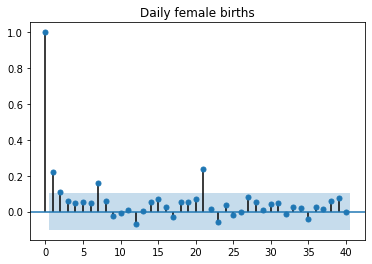

In [41]:
plot_pacf(df2,lags=40,title='Daily female births');